In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [53]:
w=32

In [54]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [55]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fdae7700000
byteorder:  little
byteswap:  False
type: float64


In [56]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [57]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fdb5b7a9000
byteorder:  little
byteswap:  False
type: float64


In [58]:
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)

In [59]:
training_sample_labels

380244

In [60]:
training_sample

380244

In [61]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [62]:
train_X.shape

(380244, 32, 15)

In [63]:
#train_y

In [64]:
#print(train_X)
my_array =train_X[:1]
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print(my_array)

[[[0.49157834 0.86486486 0.40034662 0.40213523 0.02145491 0.00307325 0.50816583 0.32602568 0.54202192 0.3442623  0.93694444 0.04504505 0.80035651 0.02466828 0.00174415]
  [0.49215751 0.86486486 0.40034662 0.40213523 0.02656721 0.00375619 0.50722362 0.32633887 0.54202192 0.39344262 0.93833333 0.04504505 0.80035651 0.03004879 0.00207956]
  [0.49206274 0.86486486 0.40034662 0.40213523 0.01969494 0.00273177 0.50942211 0.32602568 0.5408039  0.44262295 0.93833333 0.04504505 0.80035651 0.02266199 0.00160998]
  [0.49188372 0.86486486 0.40034662 0.40391459 0.02732149 0.00392693 0.50753769 0.32633887 0.53958587 0.41803279 0.92527778 0.04954955 0.80035651 0.03064156 0.00221373]
  [0.49244183 0.86486486 0.40034662 0.40213523 0.02388535 0.00341472 0.50659548 0.32602568 0.53714982 0.40163934 0.93027778 0.04954955 0.80035651 0.02708495 0.00194539]
  [0.49212066 0.86486486 0.39688042 0.40213523 0.02623198 0.00375619 0.50439698 0.32633887 0.53471376 0.40983607 0.92444444 0.04954955 0.80035651 0.0294104

In [32]:
train_y.shape

(380256,)

In [34]:
train_y=train_y.reshape(train_y.shape[0],1)

In [35]:
test_y=test_y.reshape(test_y.shape[0],1)

In [37]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [38]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),
    keras.layers.GRU(units=64,return_sequences=True),
    keras.layers.GRU(units=32),
    keras.layers.Dense(units=40,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [39]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 40)                1320      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 103,697
Trainable params: 103,697
Non-trainable params: 0
_________________________________________________________________


In [40]:
 start = t.time()

In [41]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 73s 20ms/step - loss: 0.5720 - accuracy: 0.7393 - val_loss: 0.5551 - val_accuracy: 0.7531
Epoch 2/140
2971/2971 [==============================] - 57s 19ms/step - loss: 0.5602 - accuracy: 0.7393 - val_loss: 0.5324 - val_accuracy: 0.7531
Epoch 3/140
2971/2971 [==============================] - 56s 19ms/step - loss: 0.5256 - accuracy: 0.7410 - val_loss: 0.4958 - val_accuracy: 0.7536
Epoch 4/140
2971/2971 [==============================] - 54s 18ms/step - loss: 0.5050 - accuracy: 0.7372 - val_loss: 0.4872 - val_accuracy: 0.7531
Epoch 5/140
2971/2971 [==============================] - 53s 18ms/step - loss: 0.5015 - accuracy: 0.7379 - val_loss: 0.4851 - val_accuracy: 0.7533
Epoch 6/140
2971/2971 [==============================] - 54s 18ms/step - loss: 0.4998 - accuracy: 0.7387 - val_loss: 0.4834 - val_accuracy: 0.7530
Epoch 7/140
2971/2971 [==============================] - 52s 18ms/step - loss: 0.4984 - accuracy: 0.7391 - val_loss: 0

2971/2971 [==============================] - 31s 11ms/step - loss: 0.4294 - accuracy: 0.7792 - val_loss: 0.4247 - val_accuracy: 0.7814
Epoch 112/140
2971/2971 [==============================] - 34s 11ms/step - loss: 0.4294 - accuracy: 0.7796 - val_loss: 0.4282 - val_accuracy: 0.7817
Epoch 113/140
2971/2971 [==============================] - 34s 12ms/step - loss: 0.4293 - accuracy: 0.7794 - val_loss: 0.4271 - val_accuracy: 0.7812
Epoch 114/140
2971/2971 [==============================] - 34s 11ms/step - loss: 0.4291 - accuracy: 0.7797 - val_loss: 0.4369 - val_accuracy: 0.7802
Epoch 115/140
2971/2971 [==============================] - 35s 12ms/step - loss: 0.4289 - accuracy: 0.7798 - val_loss: 0.4268 - val_accuracy: 0.7818
Epoch 116/140
2971/2971 [==============================] - 34s 11ms/step - loss: 0.4288 - accuracy: 0.7796 - val_loss: 0.4252 - val_accuracy: 0.7824
Epoch 117/140
2971/2971 [==============================] - 34s 12ms/step - loss: 0.4287 - accuracy: 0.7793 - val_loss: 0

In [42]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 12s 4ms/step


In [43]:
stop=t.time()-start
print(stop)

6090.746042013168


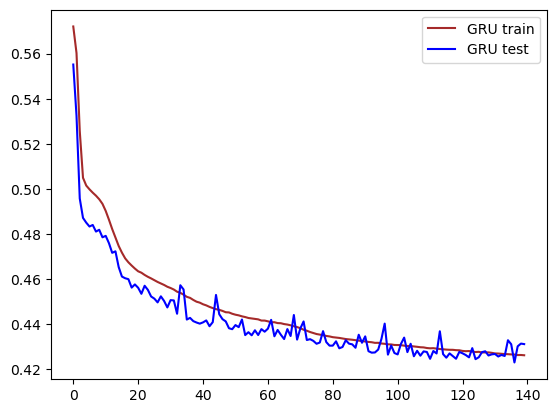

In [44]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [45]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [46]:
np.shape(pred_y)

(95065, 1)

In [47]:
pred_y

array([[0.0016174 ],
       [0.00219481],
       [0.00067578],
       ...,
       [0.03684942],
       [0.03828162],
       [0.03885477]], dtype=float32)

In [48]:
#pred_y=np.reshape(pred_y,8068)
pred_y=np.reshape(pred_y,95065)

0.14364403841200066
0.22757109936336906
0.37900400843790644
0.27840084732728804


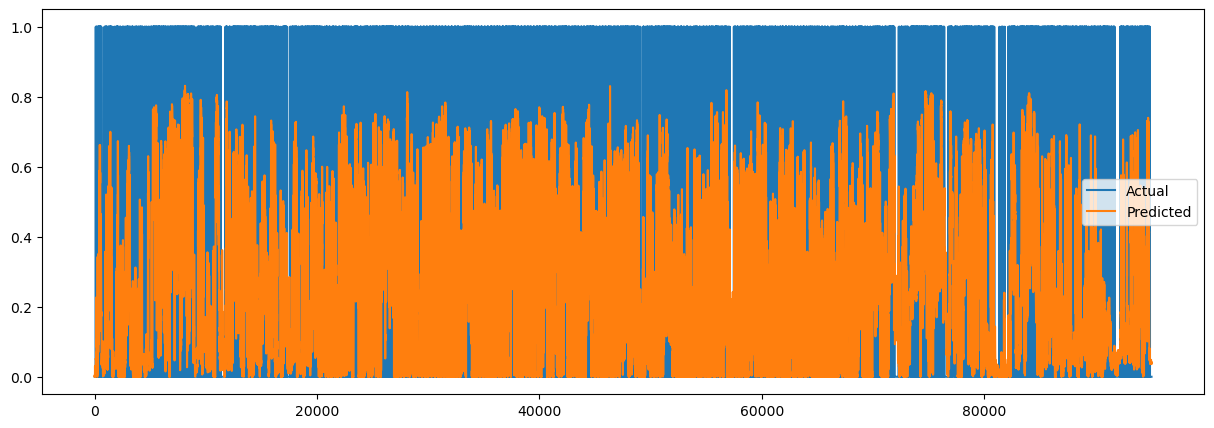

In [49]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [50]:
np.shape(train_X)

(380256, 16, 15)

In [51]:
np.shape(train_y)

(380256, 1)

In [52]:
np.shape(test_X)

(95065, 16, 15)

In [53]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 60s 4ms/step


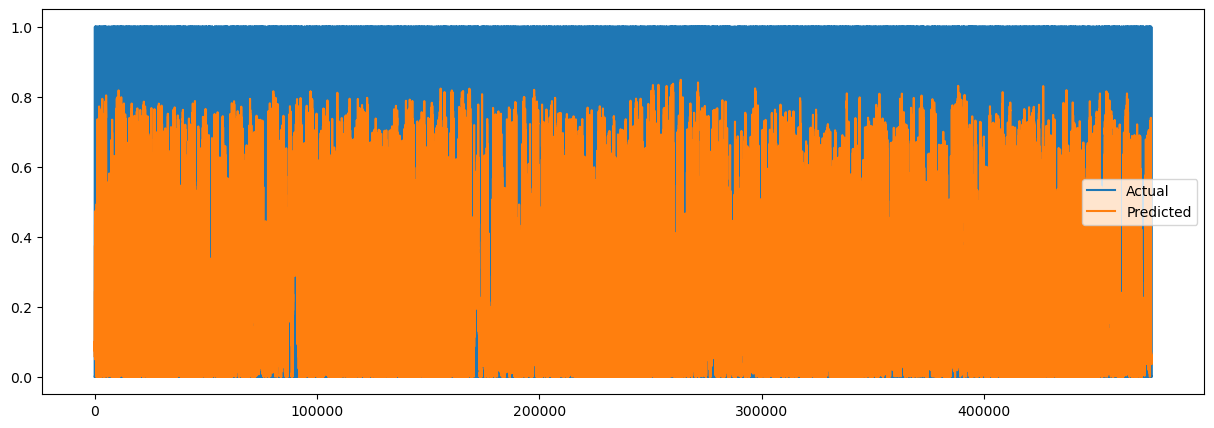

In [54]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

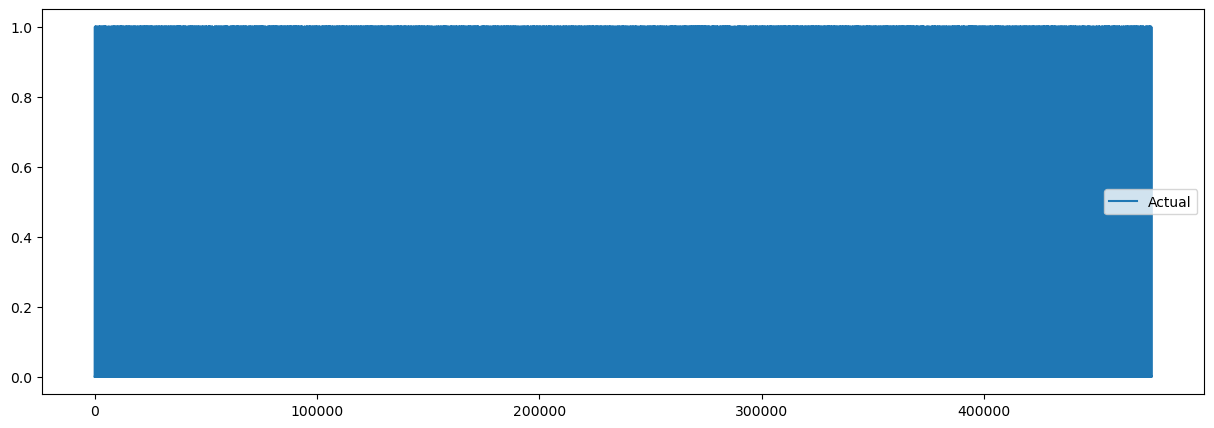

In [55]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [56]:
print(sum(tes)/len(tes))

[0.25794568]


In [57]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.6128051]
[0.81839726]
total acc [0.78199785]


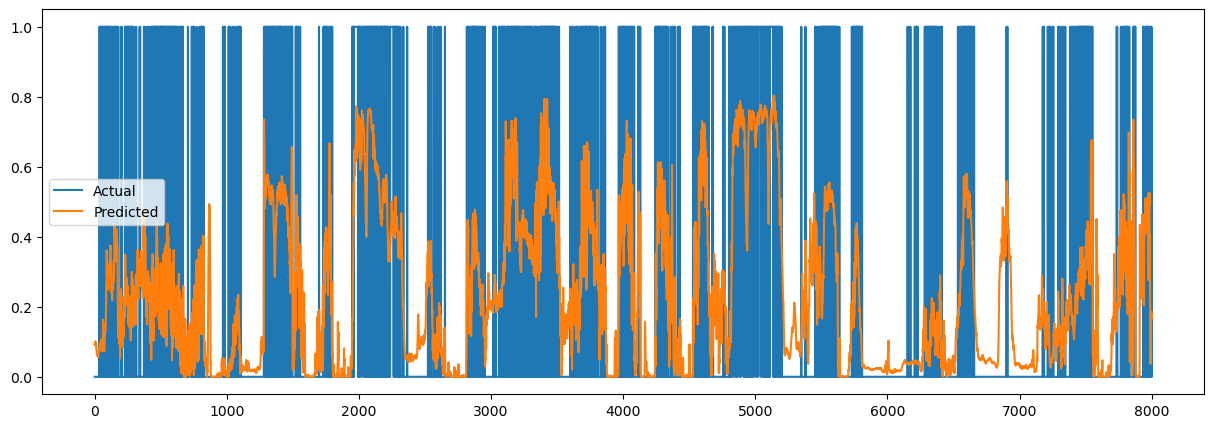

In [58]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

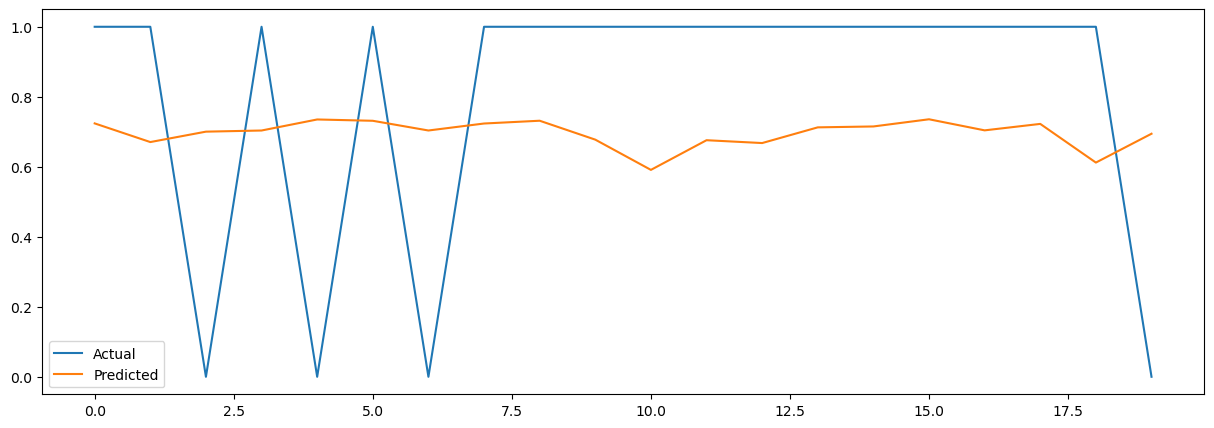

In [59]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

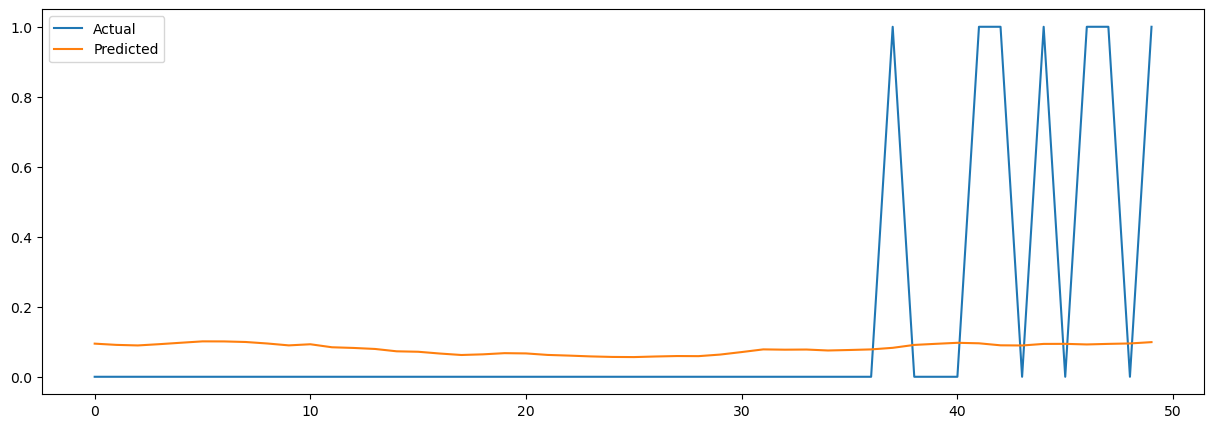

In [60]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

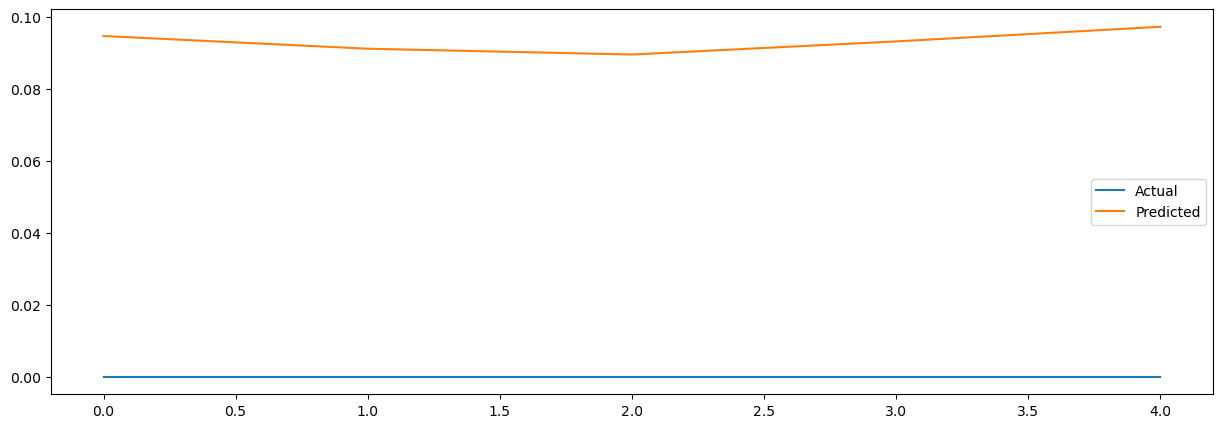

In [61]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()